# CredCastle

## Import Stuff

In [38]:
import numpy as np

from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Experiment
from cadCAD import configs

from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor


## Initial Params

In [39]:
genesis_states = {
    'castle': 0, # the castle
    'difficulty': 3, # the difficulty of building the castle
    'village_folk': 100 # the folks in the village
}

sim_config_dict = {
    'T': range(30), # 30 days
    'N': 1, # 1 month
    #'M': {}
}

## State Update Functions

In [40]:
def s_build_castle(params, step, sH, s, _input):
    y = 'castle'
    x = s[y]
    add_to_castle = 0
    villager_effort = 5 # np.random.normal(5, 2.5) # random normally distributed number between 0 and 10 
    # add_to_castle += (villager_effort * 'village_folk') / 'difficulty'
    x += villager_effort
    return (y, x)

## State Update Blocks

In [41]:
partial_state_update_blocks = [
    { 
        'policies': { # We'll ignore policies for now
        },
        'variables': { # The following state variables will be updated simultaneously
            'castle': s_build_castle
        }
    }
]

## Putting it all together

In [42]:
# imported some addition utilities to help with configuration set-up
exp = Experiment()
c = config_sim(sim_config_dict)

# The configurations above are then packaged into a `Configuration` object
del configs[:]
exp.append_configs(initial_state=genesis_states, #dict containing variable names and initial values
                       partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
                       sim_configs=c #preprocessed dictionaries containing simulation parameters
                      )

## Running the engine

In [43]:
%%capture
exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(exec_mode.local_mode)

simulation = Executor(exec_context=local_mode_ctx, configs=configs) # Pass the configuration object inside an array
raw_system_events, tensor_field, sessions = simulation.execute() # The `execute()` method returns a tuple; its first elements contains the raw results

## Data Viz

In [44]:
%matplotlib inline
import pandas as pd
simulation_result = pd.DataFrame(raw_system_events)
simulation_result.set_index(['subset', 'run', 'timestep', 'substep'])

castle  difficulty  village_folk  simulation
subset run timestep substep                                              
0      1   0        0             0           3           100           0
           1        1             5           3           100           0
           2        1            10           3           100           0
           3        1            15           3           100           0
           4        1            20           3           100           0
           5        1            25           3           100           0
           6        1            30           3           100           0
           7        1            35           3           100           0
           8        1            40           3           100           0
           9        1            45           3           100           0
           10       1            50           3           100           0
           11       1            55           3           100           0
           12       1            60           3           100           0
           13       1            65           3           100           0
           14       1            70           3           100           0
           15       1            75           3           100           0
           16       1            80           3           100           0
           17       1            85           3           100           0
           18       1            90           3           100           0
           19       1            95           3           100           0
           20       1           100           3           100           0
           21       1           105           3           100           0
           22       1           110           3           100           0
           23       1           115           3           100           0
           24       1           120           3           100           0
           25       1           125           3           100           0
           26       1           130           3           100           0
           27       1           135           3           100           0
           28       1           140           3           100           0
           29       1           145           3           100           0
           30       1           150           3           100           0

<AxesSubplot:xlabel='timestep'>

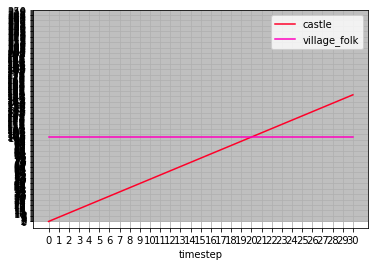

In [45]:
simulation_result.plot('timestep', ['castle', 'village_folk'], grid=True, 
        colormap = 'gist_rainbow',
        xticks=list(simulation_result['timestep'].drop_duplicates()), 
        yticks=list(range(1+(simulation_result['castle']+simulation_result['village_folk']).max())))